# Importing Libraries/CSV

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import xgboost as xgb
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import eli5
from eli5.sklearn import PermutationImportance

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [3]:
pwd

'/Users/marvind/League-Of-Legend-App/notebooks'

In [4]:
matchinfo = pd.read_csv('/Users/marvind/Desktop/League of Legend Data/data1/leagueoflegends/matchinfo.csv')
lol = pd.read_csv('/Users/marvind/Desktop/League of Legend Data/data1/leagueoflegends/LeagueofLegends1.csv')
monsters = pd.read_csv('/Users/marvind/Desktop/League of Legend Data/data1/leagueoflegends/monsters.csv')
structures = pd.read_csv('/Users/marvind/Desktop/League of Legend Data/data1/leagueoflegends/structures.csv')
kills = pd.read_csv('/Users/marvind/Desktop/League of Legend Data/data1/leagueoflegends/kills.csv')
gold = pd.read_csv('/Users/marvind/Desktop/League of Legend Data/data1/leagueoflegends/gold.csv')
bans = pd.read_csv('/Users/marvind/Desktop/League of Legend Data/data1/leagueoflegends/bans.csv')
columns = pd.read_csv('/Users/marvind/Desktop/League of Legend Data/data1/leagueoflegends/_columns.csv')

## Data Cleanup/Merging

In [82]:
lol.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,goldblue,bKills,bTowers,bInhibs,bDragons,bBarons,bHeralds,goldred,rKills,rTowers,rInhibs,rDragons,rBarons,rHeralds,blueTop,blueTopChamp,goldblueTop,blueJungle,blueJungleChamp,goldblueJungle,blueMiddle,blueMiddleChamp,goldblueMiddle,blueADC,blueADCChamp,goldblueADC,blueSupport,blueSupportChamp,goldblueSupport,blueBans,redTop,redTopChamp,goldredTop,redJungle,redJungleChamp,goldredJungle,redMiddle,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...","[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...","[[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...","[[27.542, 'MID_LANE', 'BASE_TURRET'], [39.269,...","[[36.686, 'MID_LANE'], [29.274, 'MID_LANE']]","[[37.267, None]]",[],[],"[2415, 2415, 2725, 3952, 5336, 6602, 7900, 945...","[[16.529, 'TSM Lustboy', 'C9 Balls', ['C9 Mete...","[[39.23, 'TOP_LANE', 'INNER_TURRET'], [20.681,...",[],"[[17.14, None], [30.934, None], [24.641, None]]",[[29.954]],[],Dyrus,Irelia,"[475, 475, 532, 687, 893, 1058, 1172, 1471, 18...",Santorin,RekSai,"[475, 475, 532, 870, 1049, 1276, 1596, 1815, 2...",Bjergsen,Ahri,"[475, 475, 532, 807, 1102, 1307, 1651, 1950, 2...",WildTurtle,Jinx,"[475, 475, 532, 797, 1127, 1453, 1766, 2044, 2...",Lustboy,Janna,"[515, 515, 583, 726, 897, 1077, 1227, 1381, 15...","['Rumble', 'Kassadin', 'Lissandra']",Balls,Gnar,"[475, 475, 532, 728, 958, 1284, 1526, 1912, 21...",Meteos,Elise,"[475, 475, 532, 898, 1192, 1429, 1819, 2107, 2...",Hai,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...","[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...","[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...","[[23.239, 'BOT_LANE', 'OUTER_TURRET'], [33.018...",[],"[[32.545, None], [26.177, None], [19.119, None]]",[[29.255]],[],"[2415, 2415, 2731, 4126, 5364, 6560, 7789, 893...","[[12.387, 'CST Jesiz', 'DIG Gamsu', ['DIG Ship...","[[19.257, 'MID_LANE', 'OUTER_TURRET'], [15.206...","[[36.813, 'MID_LANE']]","[[12.264, None]]",[],[],Cris,Gnar,"[475, 475, 532, 791, 1127, 1509, 1674, 1875, 2...",Impaler,Rengar,"[475, 475, 532, 895, 1176, 1334, 1447, 1859, 2...",Jesiz,Ahri,"[475, 475, 532, 816, 1102, 1413, 1624, 1937, 2...",Mash,Caitlyn,"[475, 475, 532, 856, 1182, 1468, 1653, 1890, 2...",Sheep,Leona,"[515, 515, 577, 750, 924, 1073, 1239, 1392, 15...","['Kassadin', 'Sivir', 'Lissandra']",Gamsu,Irelia,"[475, 475, 532, 811, 1042, 1237, 1625, 1852, 2...",Crumbzz,JarvanIV,"[475, 475, 532, 909, 1105, 1423, 1536, 1732, 1...",Shiphtur,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...","[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...","[[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho...","[[15.045, 'BOT_LANE', 'OUTER_TURRET'], [39.566...","[[37.511, 'TOP_LANE'], [37.38, 'BOT_LANE'], [3...","[[24.577, None], [37.867, None], [30.87, None]...",[[35.144]],[],"[2415, 2415, 2716, 3854, 4899, 6199, 7520, 859...","[[8.449, 'WFX Altec', 'GV Cop', ['GV BunnyFuFu...","[[24.62, 'MID_LANE', 'OUTER_TURRET'], [30.493,...",[],[],[],[],Flaresz,Renekton,"[475, 475, 533, 673, 828, 1075, 1428, 1775, 21...",ShorterACE,Rengar,"[475, 475, 543, 836, 1041, 1261, 1568, 2002, 2...",Pobelter,Fizz,"[475, 475, 533, 756, 1065, 1368, 2056, 2237, 2...",Altec,Sivir,"[475, 475, 533, 811, 1130

In [5]:
print(matchinfo.shape)
# match info useless all data is already in df'lol'
matchinfo.head()

(7620, 30)


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [6]:
print(monsters.shape)
monsters.head()

(44248, 4)


,Address,Team,Time,Type
0,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,37.267,DRAGON
1,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,32.545,DRAGON
2,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,26.177,DRAGON
3,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,19.119,DRAGON
4,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,24.577,DRAGON


In [7]:
monsters['Address'].value_counts().shape

(7620,)

In [8]:
monstercounts = monsters.drop(columns='Type')
monstercounts = monstercounts.rename(columns={'Time':'Count'})
monstercounts.head()

,Address,Team,Count
0,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,37.267
1,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,32.545
2,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,26.177
3,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,19.119
4,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,24.577


In [9]:
monstercounts = pd.pivot_table(monstercounts, index='Address', columns='Team', aggfunc='count')
print(monstercounts.shape)
monstercounts.head()

(7620, 6)


Count                    \
Team                                               bBarons bDragons bHeralds   
Address                                                                        
http://matchhistory.br.leagueoflegends.com/pt/#...     2.0      3.0      1.0   
http://matchhistory.br.leagueoflegends.com/pt/#...     1.0      3.0      1.0   
http://matchhistory.br.leagueoflegends.com/pt/#...     2.0      3.0      NaN   
http://matchhistory.br.leagueoflegends.com/pt/#...     NaN      1.0      NaN   
http://matchhistory.br.leagueoflegends.com/pt/#...     1.0      3.0      1.0   

                                                                              
Team                                               rBarons rDragons rHeralds  
Address                                                                       
http://matchhistory.br.leagueoflegends.com/pt/#...     NaN      NaN      NaN  
http://matchhistory.br.leagueoflegends.com/pt/#...     1.0      2.0      NaN  
http://matchhistory.br.leagueoflegends.com/pt/#...     NaN      2.0      1.0  
http://matchhistory.br.leagueoflegends.com/pt/#...     1.0      1.0      1.0  
http://matchhistory.br.leagueoflegends.com/pt/#...     NaN      1.0      NaN

In [10]:
matchinfo1 = pd.merge(matchinfo, monstercounts, on='Address')

print(matchinfo1.shape)
matchinfo1.head()

(7620, 36)


/Users/marvind/.local/share/virtualenvs/League-Of-Legend-App-J7NVRraJ/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address,"(Count, bBarons)","(Count, bDragons)","(Count, bHeralds)","(Count, rBarons)","(Count, rDragons)","(Count, rHeralds)"
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...,NaN,1.0,NaN,1.0,3.0,NaN
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,3.0,NaN,NaN,1.0,NaN
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,4.0,NaN,NaN,NaN,NaN
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,NaN,NaN,NaN,4.0,NaN
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,2.0,NaN,NaN,1.0,NaN


In [11]:
firstmonster = monsters.drop(columns='Type')
firstmonster = firstmonster.rename(columns={'Time':'firstmonster'})
firstmonster.head()

,Address,Team,firstmonster
0,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,37.267
1,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,32.545
2,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,26.177
3,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,19.119
4,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,24.577


In [12]:
firstmonster = pd.pivot_table(firstmonster, index='Address', columns='Team', aggfunc='min')
print(firstmonster.shape)
firstmonster.describe()

(7620, 6)


firstmonster                                                      \
Team       bBarons     bDragons     bHeralds      rBarons     rDragons   
count   4287.00000  6102.000000  2252.000000  4021.000000  6078.000000   
mean      29.07472    16.726496    14.583787    28.970160    15.509085   
std        5.98459     7.343480     3.427400     6.105327     6.973789   
min       19.70700     3.195000     4.319000    18.851000     3.082000   
25%       24.59400    11.318250    12.305500    24.315000    10.607000   
50%       28.05800    15.288000    14.908000    27.767000    13.857500   
75%       32.34100    20.738750    17.281000    32.367000    18.694500   
max       64.55400    53.901000    19.903000    66.202000    51.772000   

                    
Team      rHeralds  
count  1713.000000  
mean     14.503204  
std       3.555637  
min       4.273000  
25%      12.195000  
50%      14.813000  
75%      17.379000  
max      19.912000

In [13]:
matchinfo2 = pd.merge(matchinfo1, firstmonster, on='Address')

print(matchinfo2.shape)
matchinfo2.head()

(7620, 42)


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address,"(Count, bBarons)","(Count, bDragons)","(Count, bHeralds)","(Count, rBarons)","(Count, rDragons)","(Count, rHeralds)","(firstmonster, bBarons)","(firstmonster, bDragons)","(firstmonster, bHeralds)","(firstmonster, rBarons)","(firstmonster, rDragons)","(firstmonster, rHeralds)"
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...,NaN,1.0,NaN,1.0,3.0,NaN,NaN,37.267,NaN,29.954,17.140,NaN
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,3.0,NaN,NaN,1.0,NaN,29.255,19.119,NaN,NaN,12.264,NaN
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,4.0,NaN,NaN,NaN,NaN,35.144,18.255,NaN,NaN,NaN,NaN
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,NaN,NaN,NaN,4.0,NaN,37.513,NaN,NaN,NaN,10.153,NaN
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,2.0,NaN,NaN,1.0,NaN,32.556,14.589,NaN,NaN,21.901,NaN


In [14]:
lastmonster = monsters.drop(columns='Type')
lastmonster = lastmonster.rename(columns={'Time':'Last'})
lastmonster.head()

lastmonster = pd.pivot_table(lastmonster, index='Address', columns='Team', aggfunc='max')
print(lastmonster.shape)
lastmonster.head()

matchinfo3 = pd.merge(matchinfo2, lastmonster, on='Address')

print(matchinfo3.shape)
matchinfo3.head()

(7620, 6)
(7620, 48)


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address,"(Count, bBarons)","(Count, bDragons)","(Count, bHeralds)","(Count, rBarons)","(Count, rDragons)","(Count, rHeralds)","(firstmonster, bBarons)","(firstmonster, bDragons)","(firstmonster, bHeralds)","(firstmonster, rBarons)","(firstmonster, rDragons)","(firstmonster, rHeralds)","(Last, bBarons)","(Last, bDragons)","(Last, bHeralds)","(Last, rBarons)","(Last, rDragons)","(Last, rHeralds)"
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...,NaN,1.0,NaN,1.0,3.0,NaN,NaN,37.267,NaN,29.954,17.140,NaN,NaN,37.267,NaN,29.954,30.934,NaN
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,3.0,NaN,NaN,1.0,NaN,29.255,19.119,NaN,NaN,12.264,NaN,29.255,32.545,NaN,NaN,12.264,NaN
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,4.0,NaN,NaN,NaN,NaN,35.144,18.255,NaN,NaN,NaN,NaN,35.144,37.867,NaN,NaN,NaN,NaN
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,NaN,NaN,NaN,4.0,NaN,37.513,NaN,NaN,NaN,10.153,NaN,37.513,NaN,NaN,NaN,32.796,NaN
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,2.0,NaN,NaN,1.0,NaN,32.556,14.589,NaN,NaN,21.901,NaN,32.556,30.307,NaN,NaN,21.901,NaN


In [15]:
# if number - red has the lead, + Blue has the lead
print(gold.shape)
golddiff = gold[:7620]
print(golddiff.shape)
golddiff.head()

(99060, 97)
(7620, 97)


,Address,Type,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80,min_81,min_82,min_83,min_84,min_85,min_86,min_87,min_88,min_89,min_90,min_91,min_92,min_93,min_94,min_95
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-14,-65,-268,-431,-488,-789,-494,-625,-1044,-313,-760,-697,-790,-611,240,845.0,797.0,1422.0,987.0,169.0,432.0,491.0,1205.0,1527.0,1647.0,1847.0,3750.0,4719.0,3561.0,3367.0,2886.0,2906.0,4411.0,4473.0,4639.0,4762.0,4686.0,6057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-26,-18,147,237,-152,18,88,-242,102,117,802,1420,1394,1301,1489,1563.0,1368.0,1105.0,205.0,192.0,587.0,377.0,667.0,415.0,1876.0,1244.0,2130.0,2431.0,680.0,1520.0,949.0,1894.0,2644.0,3394.0,3726.0,1165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,10,-60,34,37,589,1064,1258,913,1233,1597,1575,3046,2922,3074,3626,3466.0,5634.0,5293.0,4597.0,4360.0,4616.0,4489.0,4880.0,5865.0,6993.0,7049.0,7029.0,7047.0,7160.0,7081.0,7582.0,9917.0,10337.0,9823.0,12307.0,13201.0,13924.0,13915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,0,0,-15,25,228,-6,-243,175,-346,16,-258,-57,-190,-111,-335,-8,324,428.0,-124.0,768.0,2712.0,1813.0,198.0,1242.0,1245.0,1278.0,1240.0,-664.0,-1195.0,-1157.0,-2161.0,-2504.0,-3873.0,-3688.0,-3801.0,-3668.0,-3612.0,-5071.0,-2825.0,-1464.0,-4507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,40,40,44,-36,113,158,-121,-191,23,205,156,272,-271,-896,-574,177,-425,-730.0,-318.0,478.0,926.0,761.0,-286.0,473.0,490.0,1265.0,2526.0,3890.0,4319.0,5121.0,5140.0,5141.0,6866.0,9517.0,11322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
golddiff = golddiff.drop(columns='Type')
matchinfo4 = pd.merge(matchinfo3, golddiff, on='Address')

print(matchinfo4.shape)
matchinfo4.head()

(7620, 143)


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address,"(Count, bBarons)","(Count, bDragons)","(Count, bHeralds)","(Count, rBarons)","(Count, rDragons)","(Count, rHeralds)","(firstmonster, bBarons)","(firstmonster, bDragons)","(firstmonster, bHeralds)","(firstmonster, rBarons)","(firstmonster, rDragons)","(firstmonster, rHeralds)","(Last, bBarons)","(Last, bDragons)","(Last, bHeralds)","(Last, rBarons)","(Last, rDragons)","(Last, rHeralds)",min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80,min_81,min_82,min_83,min_84,min_85,min_86,min_87,min_88,min_89,min_90,min_91,min_92,min_93,min_94,min_95
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...,NaN,1.0,NaN,1.0,3.0,NaN,NaN,37.267,NaN,29.954,17.140,NaN,NaN,37.267,NaN,29.954,30.934,NaN,0,0,-14,-65,-268,-431,-488,-789,-494,-625,-1044,-313,-760,-697,-790,-611,240,845.0,797.0,1422.0,987.0,169.0,432.0,491.0,1205.0,1527.0,1647.0,1847.0,3750.0,4719.0,3561.0,3367.0,2886.0,2906.0,4411.0,4473.0,4639.0,4762.0,4686.0,6057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,3.0,NaN,NaN,1.0,NaN,29.255,19.119,NaN,NaN,12.264,NaN,29.255,32.545,NaN,NaN,12.264,NaN,0,0,-26,-18,147,237,-152,18,88,-242,102,117,802,1420,1394,1301,1489,1563.0,1368.0,1105.0,205.0,192.0,587.0,377.0,667.0,415.0,1876.0,1244.0,2130.0,2431.0,680.0,1520.0,949.0,1894.0,2644.0,3394.0,3726.0,1165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,4.0,NaN,NaN,NaN,NaN,35.144,18.255,NaN,NaN,NaN,NaN,35.144,37.867,NaN,NaN,NaN,NaN,0,0,10,-60,34,37,589,1064,1258,913,1233,1597,1575,3046,2922,3074,3626,3466.0,5634.0,5293.0,4597.0,4360.0,4616.0,4489.0,4880.0,5865.0,6993.0,7049.0,7029.0,7047.0,7160.0,7081.0,7582.0,9917.0,10337.0,9823.0,12307.0,13201.0,13924.0,13915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,NaN,NaN,NaN,4.0,NaN,37.513,NaN,NaN,NaN,10.153,NaN,37.513,NaN,NaN,NaN,32.796,NaN,0,0,-15,25,228,-6,-243,

In [17]:
matchinfo4.isnull().sum()

League                         0
Year                           0
Season                         0
Type                           0
blueTeamTag                   38
bResult                        0
rResult                        0
redTeamTag                    37
gamelength                     0
blueTop                       37
blueTopChamp                   0
blueJungle                    28
blueJungleChamp                0
blueMiddle                    37
blueMiddleChamp                0
blueADC                       37
blueADCChamp                   0
blueSupport                   37
blueSupportChamp               0
redTop                        37
redTopChamp                    0
redJungle                     24
redJungleChamp                 0
redMiddle                     37
redMiddleChamp                 0
redADC                        37
redADCChamp                    0
redSupport                    37
redSupportChamp                0
Address                        0
(Count, bB

In [18]:
matchinfo5 = matchinfo4.loc[:,:'min_25']
print(matchinfo5.shape)
matchinfo5.describe()

(7620, 73)


,Year,bResult,rResult,gamelength,"(Count, bBarons)","(Count, bDragons)","(Count, bHeralds)","(Count, rBarons)","(Count, rDragons)","(Count, rHeralds)","(firstmonster, bBarons)","(firstmonster, bDragons)","(firstmonster, bHeralds)","(firstmonster, rBarons)","(firstmonster, rDragons)","(firstmonster, rHeralds)","(Last, bBarons)","(Last, bDragons)","(Last, bHeralds)","(Last, rBarons)","(Last, rDragons)","(Last, rHeralds)",min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25
count,7620.000000,7620.000000,7620.000000,7620.000000,4287.000000,6102.000000,2252.000000,4021.000000,6078.000000,1713.000000,4287.00000,6102.000000,2252.000000,4021.000000,6078.000000,1713.000000,4287.000000,6102.000000,2252.000000,4021.000000,6078.000000,1713.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7619.000000,7617.000000,7616.000000,7609.000000,7596.000000,7570.000000,7533.000000,7441.000000
mean,2016.280971,0.544094,0.455906,37.012598,1.288547,2.315143,1.101687,1.385476,2.411649,1.101576,29.07472,16.726496,14.583787,28.970160,15.509085,14.503204,31.848649,28.082168,15.262593,32.563700,27.818512,15.196207,0.099738,1.356955,4.275984,12.169948,14.068373,27.607218,34.125197,45.887139,50.454987,68.499475,86.889239,112.338845,138.248425,167.458268,196.509186,226.510367,257.776115,294.803255,341.007221,369.026654,387.768958,423.205371,438.712417,473.618877,502.037495
std,0.848200,0.498085,0.498085,7.983238,0.522492,1.123499,0.335725,0.608095,1.190582,0.333424,5.98459,7.343480,3.427400,6.105327,6.973789,3.555637,7.711654,9.505853,3.087399,7.978581,9.882329,3.226741,5.203866,68.964357,134.524929,260.965384,436.757106,550.766997,673.711445,805.225065,949.152294,1114.470576,1295.163720,1518.631849,1754.230219,2012.207392,2279.744113,2594.618169,2905.419815,3234.960749,3571.169849,3877.647876,4185.156709,4522.020205,4904.701215,5327.989884,5688.037467
min,2014.000000,0.000000,0.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.70700,3.195000,4.319000,18.851000,3.082000,4.273000,19.707000,3.290000,4.611000,19.831000,3.845000,4.467000,-80.000000,-1273.000000,-1327.000000,-1544.000000,-2737.000000,-2667.000000,-2977.000000,-3723.000000,-4426.000000,-5772.000000,-7300.000000,-7988.000000,-9153.000000,-10101.000000,-11236.000000,-11516.000000,-13935.000000,-16860.000000,-16477.000000,-17342.000000,-19558.000000,-21143.000000,-17829.000000,-18687.000000,-21045.000000
25%,2016.000000,0.000000,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.59400,11.318250,12.305500,24.315000,10.607000,12.195000,26.012500,22.054000,13.089000,26.521000,21.061750,12.935000,0.000000,0.000000,-34.000000,-111.000000,-184.000000,-279.250000,-357.000000,-436.000000,-520.000000,-583.250000,-698.000000,-819.000000,-953.000000,-1067.000000,-1194.250000,-1407.250000,-1592.250000,-1750.500000,-1958.000000,-2120.250000,-2301.000000,-2493.250000,-2744.000000,-2982.000000,-3223.000000
50%,2016.000000,1.000000,0.000000,36.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,28.05800,15.288000,14.908000,27.767000,13.857500,14.813000,30.650000,27.903500,15.689000,31.508000,27.826000,15.730000,0.000000,0.000000,0.000000,8.000000,9.000000,20.000000,25.000000,33.000000,26.000000,42.000000,53.000000,78.500000,96.000000,134.000000,145.000000,186.500000,228.000000,269.000000,280.000000,380.000000,391.000000,389.000000,403.500000,453.000000,413.000000
75%,2017.000000,1.000000,1.000000,41.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,32.34100,20.738750,17.281000,32.367000,18.694500,17.379000,36.140000,33.960000,17.734750,37.089000,34.224500,17.850000,0.000000,0.000000,38.000000,127.000000,213.000000,342.000000,428.250000,521.500000,602.250000,713.000000,860.000000,1

In [19]:
print(kills.shape)
kills.head()

(191069, 11)


,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643


In [20]:
kills1 = kills.drop(columns=['Victim', 'Killer', 'Assist_1', 'Assist_2', 'Assist_3', 'Assist_4'])
kills1 = kills1.rename(columns={'Time':'First_Kill'})
kills1.head()

,Address,Team,First_Kill,x_pos,y_pos
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,9229,8469
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,13908,5960
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,8281,7889
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,8522,8895
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,8902,7643


In [21]:
firstkill = pd.pivot_table(kills1, index='Address', columns='Team', aggfunc='min')
print(firstkill.shape)
firstkill.head()

(7620, 6)


First_Kill         x_pos  \
Team                                                   bKills rKills bKills   
Address                                                                       
http://matchhistory.br.leagueoflegends.com/pt/#...      9.513    NaN   5382   
http://matchhistory.br.leagueoflegends.com/pt/#...      7.937  2.639  10299   
http://matchhistory.br.leagueoflegends.com/pt/#...      5.127  6.868  10865   
http://matchhistory.br.leagueoflegends.com/pt/#...     19.424  6.555   2369   
http://matchhistory.br.leagueoflegends.com/pt/#...      3.406  3.352  10055   

                                                           y_pos         
Team                                               rKills bKills rKills  
Address                                                                  
http://matchhistory.br.leagueoflegends.com/pt/#...    NaN  10002    NaN  
http://matchhistory.br.leagueoflegends.com/pt/#...  10977  10254  10157  
http://matchhistory.br.leagueoflegends.com/pt/#...   1130   1059  10003  
http://matchhistory.br.leagueoflegends.com/pt/#...  10037  10322   1016  
http://matchhistory.br.leagueoflegends.com/pt/#...   1051  10182  10631

In [22]:
matchinfo6 = pd.merge(matchinfo5, firstkill, on='Address')

print(matchinfo6.shape)
matchinfo6.head()

(7620, 79)


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address,"(Count, bBarons)","(Count, bDragons)","(Count, bHeralds)","(Count, rBarons)","(Count, rDragons)","(Count, rHeralds)","(firstmonster, bBarons)","(firstmonster, bDragons)","(firstmonster, bHeralds)","(firstmonster, rBarons)","(firstmonster, rDragons)","(firstmonster, rHeralds)","(Last, bBarons)","(Last, bDragons)","(Last, bHeralds)","(Last, rBarons)","(Last, rDragons)","(Last, rHeralds)",min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,"(First_Kill, bKills)","(First_Kill, rKills)","(x_pos, bKills)","(x_pos, rKills)","(y_pos, bKills)","(y_pos, rKills)"
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...,NaN,1.0,NaN,1.0,3.0,NaN,NaN,37.267,NaN,29.954,17.140,NaN,NaN,37.267,NaN,29.954,30.934,NaN,0,0,-14,-65,-268,-431,-488,-789,-494,-625,-1044,-313,-760,-697,-790,-611,240,845.0,797.0,1422.0,987.0,169.0,432.0,491.0,1205.0,10.820,16.529,13908,10782,10314,10313
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,3.0,NaN,NaN,1.0,NaN,29.255,19.119,NaN,NaN,12.264,NaN,29.255,32.545,NaN,NaN,12.264,NaN,0,0,-26,-18,147,237,-152,18,88,-242,102,117,802,1420,1394,1301,1489,1563.0,1368.0,1105.0,205.0,192.0,587.0,377.0,667.0,11.104,12.387,10142,10522,2686,2170
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,4.0,NaN,NaN,NaN,NaN,35.144,18.255,NaN,NaN,NaN,NaN,35.144,37.867,NaN,NaN,NaN,NaN,0,0,10,-60,34,37,589,1064,1258,913,1233,1597,1575,3046,2922,3074,3626,3466.0,5634.0,5293.0,4597.0,4360.0,4616.0,4489.0,4880.0,5.255,8.449,10060,10524,10518,10166
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,NaN,NaN,NaN,4.0,NaN,37.513,NaN,NaN,NaN,10.153,NaN,37.513,NaN,NaN,NaN,32.796,NaN,0,0,-15,25,228,-6,-243,175,-346,16,-258,-57,-190,-111,-335,-8,324,428.0,-124.0,768.0,2712.0,1813.0,198.0,1242.0,1245.0,8.274,7.768,10462,10054,13787,12133
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,2.0,NaN,NaN,1.0,NaN,32.556,14.589,NaN,NaN,21.901,NaN,32.556,30.307,NaN,NaN,21.901,NaN,40,40,44,-36,113,158,-121,-191,23,205,156,272,-271,-896,-574,177,-425,-730.0,-318.0,478.0,926.0,761.0,-286.0,473.0,490.0,11.438,11.988,10715,10847,10414,10175


In [23]:
print(structures.shape)
structures.head()

(121386, 5)


,Address,Team,Time,Lane,Type
0,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,27.542,MID_LANE,BASE_TURRET
1,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,39.269,MID_LANE,NEXUS_TURRET
2,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.583,BOT_LANE,INNER_TURRET
3,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,23.038,TOP_LANE,INNER_TURRET
4,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,16.556,BOT_LANE,OUTER_TURRET


In [24]:
structure1 = structures.drop(columns=['Lane', 'Type'])
structure1 = structure1.rename(columns={'Time':'First_Structure'})
structure1.head()

,Address,Team,First_Structure
0,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,27.542
1,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,39.269
2,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,33.583
3,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,23.038
4,http://matchhistory.na.leagueoflegends.com/en/...,bTowers,16.556


In [25]:
firststructure = pd.pivot_table(structure1, index='Address', columns='Team', aggfunc='min')
print(firststructure.shape)
firststructure.head()

(7620, 4)


First_Structure          \
Team                                                       bInhibs bTowers   
Address                                                                      
http://matchhistory.br.leagueoflegends.com/pt/#...          29.056   9.397   
http://matchhistory.br.leagueoflegends.com/pt/#...             NaN   8.670   
http://matchhistory.br.leagueoflegends.com/pt/#...          40.649  16.682   
http://matchhistory.br.leagueoflegends.com/pt/#...             NaN  12.130   
http://matchhistory.br.leagueoflegends.com/pt/#...          30.306  13.159   

                                                                    
Team                                               rInhibs rTowers  
Address                                                             
http://matchhistory.br.leagueoflegends.com/pt/#...     NaN  16.514  
http://matchhistory.br.leagueoflegends.com/pt/#...  42.063  10.094  
http://matchhistory.br.leagueoflegends.com/pt/#...     NaN   9.075  
http://matchhistory.br.leagueoflegends.com/pt/#...  22.337   9.340  
http://matchhistory.br.leagueoflegends.com/pt/#...     NaN  13.053

In [26]:
matchinfo7 = pd.merge(matchinfo6, firststructure, on='Address')

print(matchinfo7.shape)
matchinfo7.head()

(7620, 83)


,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address,"(Count, bBarons)","(Count, bDragons)","(Count, bHeralds)","(Count, rBarons)","(Count, rDragons)","(Count, rHeralds)","(firstmonster, bBarons)","(firstmonster, bDragons)","(firstmonster, bHeralds)","(firstmonster, rBarons)","(firstmonster, rDragons)","(firstmonster, rHeralds)","(Last, bBarons)","(Last, bDragons)","(Last, bHeralds)","(Last, rBarons)","(Last, rDragons)","(Last, rHeralds)",min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,"(First_Kill, bKills)","(First_Kill, rKills)","(x_pos, bKills)","(x_pos, rKills)","(y_pos, bKills)","(y_pos, rKills)","(First_Structure, bInhibs)","(First_Structure, bTowers)","(First_Structure, rInhibs)","(First_Structure, rTowers)"
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...,NaN,1.0,NaN,1.0,3.0,NaN,NaN,37.267,NaN,29.954,17.140,NaN,NaN,37.267,NaN,29.954,30.934,NaN,0,0,-14,-65,-268,-431,-488,-789,-494,-625,-1044,-313,-760,-697,-790,-611,240,845.0,797.0,1422.0,987.0,169.0,432.0,491.0,1205.0,10.820,16.529,13908,10782,10314,10313,29.274,15.014,NaN,15.288
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,3.0,NaN,NaN,1.0,NaN,29.255,19.119,NaN,NaN,12.264,NaN,29.255,32.545,NaN,NaN,12.264,NaN,0,0,-26,-18,147,237,-152,18,88,-242,102,117,802,1420,1394,1301,1489,1563.0,1368.0,1105.0,205.0,192.0,587.0,377.0,667.0,11.104,12.387,10142,10522,2686,2170,NaN,15.306,36.813,15.206
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,4.0,NaN,NaN,NaN,NaN,35.144,18.255,NaN,NaN,NaN,NaN,35.144,37.867,NaN,NaN,NaN,NaN,0,0,10,-60,34,37,589,1064,1258,913,1233,1597,1575,3046,2922,3074,3626,3466.0,5634.0,5293.0,4597.0,4360.0,4616.0,4489.0,4880.0,5.255,8.449,10060,10524,10518,10166,33.289,15.045,NaN,24.620
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...,1.0,NaN,NaN,NaN,4.0,NaN,37.513,NaN,NaN,NaN,10.153,NaN,37.513,NaN,NaN,NaN,32.796,NaN,0,0,-15,25,228,-6,-243,175,-346,16,-258,-57,-190,-111,-335,-8,324,428.0,-124.0,768.0,2712.0,1813.0,198.0,1242.0,1245.0,8.274,7.768,10462,10054,13787,12133,NaN,18.541,35.867,19.122
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...,1.0,2.0,NaN,NaN,1.0,NaN,32.556,14.589,NaN,NaN,21.901,NaN,32.556,30.307,NaN,NaN,21.901,NaN,40,40,44,-36,113,158,-121,-191,23,205,156,272,-271,-896,-574,177,-425,-730.0,-318.0,478.0,926.0,761.0,-286.0,473.0,490.0,11.438,11.988,10715,10847,10414,10175,34.069,14.976,NaN,11.644


# Feature Engineering

In [27]:
matchinfo7.columns

Index([                      'League',                         'Year',
                             'Season',                         'Type',
                        'blueTeamTag',                      'bResult',
                            'rResult',                   'redTeamTag',
                         'gamelength',                      'blueTop',
                       'blueTopChamp',                   'blueJungle',
                    'blueJungleChamp',                   'blueMiddle',
                    'blueMiddleChamp',                      'blueADC',
                       'blueADCChamp',                  'blueSupport',
                   'blueSupportChamp',                       'redTop',
                        'redTopChamp',                    'redJungle',
                     'redJungleChamp',                    'redMiddle',
                     'redMiddleChamp',                       'redADC',
                        'redADCChamp',                   'redSupport',
      

In [28]:
#0 noone, -1 blue first baron, 1 red first baron
matchinfo7[[('firstmonster', 'bBarons'), ('firstmonster', 'rBarons')]] = matchinfo7[[('firstmonster', 'bBarons'), ('firstmonster', 'rBarons')]].fillna(100)
matchinfo7['fba'] = matchinfo7[('firstmonster', 'rBarons')] - matchinfo7[('firstmonster', 'bBarons')]
matchinfo7['First_Baron'] = matchinfo7['fba'].apply(lambda x: 0 if x == 0 else(-1 if x > 0 else 1))

# 0 noone got herald, -1 blue first herald, 1 red first herald
matchinfo7[[('firstmonster', 'bHeralds'), ('firstmonster', 'rHeralds')]] = matchinfo7[[('firstmonster', 'bHeralds'), ('firstmonster', 'rHeralds')]].fillna(100)
matchinfo7['fh'] = matchinfo7[('firstmonster', 'rHeralds')] - matchinfo7[('firstmonster', 'bHeralds')]
matchinfo7['First_Herald'] = matchinfo7['fh'].apply(lambda x: 0 if x == 0 else(-1 if x > 0 else 1))

# o no dragon, -1 blue first dragon, 1 red first dragon
matchinfo7[[('firstmonster', 'rDragons'), ('firstmonster', 'bDragons')]] = matchinfo7[[('firstmonster', 'rDragons'), ('firstmonster', 'bDragons')]].fillna(100)
matchinfo7['fd'] = matchinfo7[('firstmonster', 'rDragons')] - matchinfo7[('firstmonster', 'bDragons')]
matchinfo7['First_Dragon'] = matchinfo7['fd'].apply(lambda x: 0 if x == 0 else(-1 if x > 0 else 1))

# 0 blue first tower, 1 red first tower
matchinfo7[[('First_Structure', 'rTowers'), ('First_Structure', 'bTowers')]] = matchinfo7[[('First_Structure', 'rTowers'), ('First_Structure', 'bTowers')]].fillna(100)
matchinfo7['fs'] = matchinfo7[('First_Structure', 'rTowers')] - matchinfo7[('First_Structure', 'bTowers')]
matchinfo7['First_Tower'] = matchinfo7['fs'].apply(lambda x: 0 if x > 0 else 1)

# 0 blue firstblood, 1 red first blood
matchinfo7[[('First_Kill', 'rKills'), ('First_Kill', 'bKills')]] = matchinfo7[[('First_Kill', 'rKills'), ('First_Kill', 'bKills')]].fillna(100)
matchinfo7['fb'] = matchinfo7[('First_Kill', 'rKills')] - matchinfo7[('First_Kill', 'bKills')]
matchinfo7['First_Blood'] = matchinfo7['fb'].apply(lambda x: 0 if x > 0 else 1)

# if 0 blue won , if 1 red won
matchinfo7['Win_Team'] = matchinfo7['bResult'].apply(lambda x: 0 if x == 1 else 1)

lol_nonames = matchinfo7.drop(columns=['bResult', 'rResult', 'Address', 'blueTeamTag', 'redTeamTag', 'blueTop', 'blueJungle', 'blueMiddle',
                                       'blueADC', 'blueSupport', 'redTop', 'redJungle', 'redMiddle', 'redADC', 'redSupport', ('First_Structure', 'bInhibs'),
                                       ('First_Structure', 'rInhibs'), ('Count', 'bHeralds'), ('Count', 'bBarons'), ('Count', 'rBarons'),
                                       ('Count', 'rHeralds'), ('Last', 'bHeralds'), ('Last', 'rHeralds'), ('First_Kill', 'rKills'), 
                                       ('First_Kill', 'bKills'), 'fb', 'fs', ('First_Structure', 'rTowers'), ('First_Structure', 'bTowers'),
                                       'fd', ('firstmonster', 'rDragons'), ('firstmonster', 'bDragons'), ('Last', 'rBarons'), ('Last', 'bDragons'),
                                       ('Last', 'bBarons'), ('Last', 'rDragons'), 'fh', ('firstmonster', 'bHeralds'), ('firstmonster', 'rHeralds'),
                                       'fba', ('firstmonster', 'bBarons'), ('firstmonster', 'rBarons')])

lol_nonames = lol_nonames.rename(columns={('Count', 'bDragons'):'Total_bDragon_Count', ('Count', 'rDragons'):'Total_rDragon_Count',
                                          ('x_pos', 'rKills'):'x_pos_rkill', ('y_pos', 'rKills'):'y_pos_rkill', ('x_pos', 'bKills'):'x_pos_bkill',
                                           ('y_pos', 'bKills'):'y_pos_bkill'})

lol_nonames = lol_nonames.fillna(0)

In [29]:
print(lol_nonames.shape)
lol_nonames.head()

(7620, 52)


,League,Year,Season,Type,gamelength,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp,Total_bDragon_Count,Total_rDragon_Count,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,x_pos_bkill,x_pos_rkill,y_pos_bkill,y_pos_rkill,First_Baron,First_Herald,First_Dragon,First_Tower,First_Blood,Win_Team
0,NALCS,2015,Spring,Season,40,Irelia,RekSai,Ahri,Jinx,Janna,Gnar,Elise,Fizz,Sivir,Thresh,1.0,3.0,0,0,-14,-65,-268,-431,-488,-789,-494,-625,-1044,-313,-760,-697,-790,-611,240,845.0,797.0,1422.0,987.0,169.0,432.0,491.0,1205.0,13908,10782,10314,10313,1,0,1,0,0,0
1,NALCS,2015,Spring,Season,38,Gnar,Rengar,Ahri,Caitlyn,Leona,Irelia,JarvanIV,Azir,Corki,Annie,3.0,1.0,0,0,-26,-18,147,237,-152,18,88,-242,102,117,802,1420,1394,1301,1489,1563.0,1368.0,1105.0,205.0,192.0,587.0,377.0,667.0,10142,10522,2686,2170,-1,0,1,1,0,1
2,NALCS,2015,Spring,Season,40,Renekton,Rengar,Fizz,Sivir,Annie,Sion,LeeSin,Azir,Corki,Janna,4.0,0.0,0,0,10,-60,34,37,589,1064,1258,913,1233,1597,1575,3046,2922,3074,3626,3466.0,5634.0,5293.0,4597.0,4360.0,4616.0,4489.0,4880.0,10060,10524,10518,10166,-1,0,-1,0,0,0
3,NALCS,2015,Spring,Season,41,Irelia,JarvanIV,Leblanc,Sivir,Thresh,Gnar,Nunu,Lulu,KogMaw,Janna,0.0,4.0,0,0,-15,25,228,-6,-243,175,-346,16,-258,-57,-190,-111,-335,-8,324,428.0,-124.0,768.0,2712.0,1813.0,198.0,1242.0,1245.0,10462,10054,13787,12133,-1,0,1,0,1,1
4,NALCS,2015,Spring,Season,35,Gnar,JarvanIV,Lissandra,Tristana,Janna,Sion,RekSai,Lulu,Corki,Annie,2.0,1.0,40,40,44,-36,113,158,-121,-191,23,205,156,272,-271,-896,-574,177,-425,-730.0,-318.0,478.0,926.0,761.0,-286.0,473.0,490.0,10715,10847,10414,10175,-1,0,-1,1,0,0


## Random Exploratory Visuals

In [30]:
kills.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643


In [90]:
type(kills['Assist_2'][0])

float

In [94]:
kills1 = kills[['Killer', 'Assist_1', 'Assist_2', 'Assist_3', 'Assist_4']]

kills2 = kills1.applymap(lambda x: 0 if str(x) == 'NaN' else 1)
kills2.head()

,Killer,Assist_1,Assist_2,Assist_3,Assist_4
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


In [31]:
points = kills[['x_pos', 'y_pos', 'Team', 'Time' ]]
points.head()

,x_pos,y_pos,Team,Time
0,9229,8469,bKills,10.820
1,13908,5960,bKills,16.286
2,8281,7889,bKills,18.733
3,8522,8895,bKills,18.880
4,8902,7643,bKills,27.005


In [38]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191069 entries, 0 to 191068
Data columns (total 4 columns):
x_pos    191069 non-null int64
y_pos    191069 non-null int64
Team     191069 non-null object
Time     191069 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.8+ MB


In [74]:
points.describe()

,Win_Team
count,7620.000000
mean,0.455906
std,0.498085
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [77]:
points['x_pos_rkill'].value_counts()

0        73
10030    18
10090    16
1024     15
10004    14
         ..
13606     1
5999      1
12138     1
12405     1
11471     1
Name: x_pos_rkill, Length: 3418, dtype: int64

In [36]:
points = points.fillna(0)

In [37]:
points = points.applymap(lambda x: x if x =='bKills' else (x if x=='rKills' else (0 if x=='TooEarly' else int(x) )))

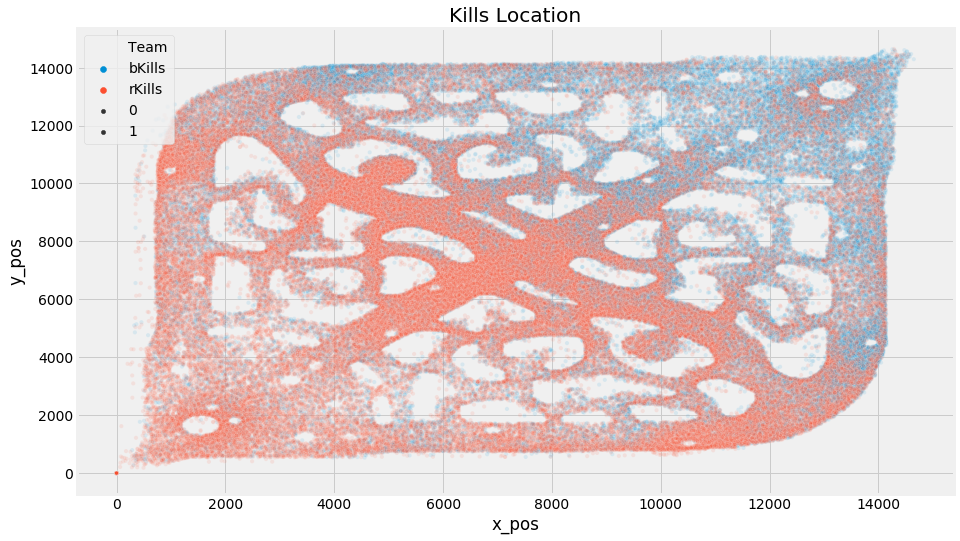

In [61]:
plt.style.use('fivethirtyeight');
plt.figure(figsize=(14, 8), facecolor='w')
sns.scatterplot(x='x_pos', y='y_pos', hue='Team', alpha=0.1, size=1, data=points, legend='brief')
plt.title('Kills Location');

In [45]:
points['Team'].value_counts()

bKills    98342
rKills    92727
Name: Team, dtype: int64

# Train/Test Split

In [66]:
train, test  = train_test_split(lol_nonames, train_size=0.70, test_size=0.30, 
                               random_state=4)

In [67]:
train.shape, test.shape

((5334, 52), (2286, 52))

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 462 to 1146
Data columns (total 52 columns):
League                 5334 non-null object
Year                   5334 non-null int64
Season                 5334 non-null object
Type                   5334 non-null object
gamelength             5334 non-null int64
blueTopChamp           5334 non-null object
blueJungleChamp        5334 non-null object
blueMiddleChamp        5334 non-null object
blueADCChamp           5334 non-null object
blueSupportChamp       5334 non-null object
redTopChamp            5334 non-null object
redJungleChamp         5334 non-null object
redMiddleChamp         5334 non-null object
redADCChamp            5334 non-null object
redSupportChamp        5334 non-null object
Total_bDragon_Count    5334 non-null float64
Total_rDragon_Count    5334 non-null float64
min_1                  5334 non-null int64
min_2                  5334 non-null int64
min_3                  5334 non-null int64
min_4         

# Feature Selection

In [33]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Season,5334,2,Summer,2873
Type,5334,5,Season,3987
League,5334,15,LCK,1005
blueADCChamp,5334,27,Lucian,579
redADCChamp,5334,29,Sivir,638
redSupportChamp,5334,49,Braum,722
blueSupportChamp,5334,51,Braum,763
blueJungleChamp,5334,52,RekSai,774
redJungleChamp,5334,57,RekSai,824
blueMiddleChamp,5334,66,Orianna,482


In [68]:
target = 'Win_Team'

train_features = train.drop(columns=[target, 'gamelength', 'min_25', 'Total_rDragon_Count', 'Total_bDragon_Count',
                                     'min_24', 'min_23', 'min_22', 'min_21', 'Year', 'min_1', 'min_2', 'min_3', 'min_4', 'min_5',
                                     'min_6', 'min_7', 'min_8', 'min_9', 'min_10', 'min_11', 'min_12', 'min_13', 'min_14',
                                     'min_16', 'min_17', 'min_18', 'min_19', 'min_20', 'First_Baron'])

# Get a list of the numeric features
features_numerical = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 100].index.tolist()

features = features_numerical + categorical_features

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [279]:
X_test.head()

,min_15,First_Herald,First_Dragon,First_Tower,First_Blood,League,Season,Type,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp
2789,-358,0,-1,0,0,LCK,Summer,Season,TahmKench,Nidalee,Varus,Sivir,Taric,Gnar,Gragas,Azir,Ashe,Braum
4633,-3271,0,1,1,1,TCL,Summer,Season,Maokai,Elise,Azir,Ezreal,Braum,Fizz,Kindred,Ryze,Lucian,Bard
4840,2130,-1,-1,0,0,TCL,Spring,Season,Camille,Rengar,Syndra,Caitlyn,Karma,Fiora,LeeSin,Cassiopeia,Sivir,Lulu
4398,3320,0,-1,0,0,TCL,Spring,Season,Sion,LeeSin,Ahri,Graves,Braum,Maokai,RekSai,Cassiopeia,Tristana,Thresh
3734,-2062,0,-1,1,1,LMS,Summer,Season,Shen,Graves,Leblanc,Sivir,Braum,Gnar,RekSai,TwistedFate,Lucian,Trundle


# Model

In [280]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(random_state=42)
)

param_distributions = {
    'xgbclassifier__n_estimators': randint(50,500),
    'xgbclassifier__eta': uniform(0,1),
    'xgbclassifier__max_depth': randint(3,12),
    'xgbclassifier__gamma': randint(0,3),
    'xgbclassifier__subsample': uniform(0,1)
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=2
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   18.3s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   25.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   31.1s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   47.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   51.0s finished


In [281]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation accuracy', search.best_score_)

Best hyperparameters {'xgbclassifier__eta': 0.7234865388209613, 'xgbclassifier__gamma': 0, 'xgbclassifier__max_depth': 6, 'xgbclassifier__n_estimators': 82, 'xgbclassifier__subsample': 0.7363754167568108}
Cross-validation accuracy 0.7174728158980127


In [71]:
pipe = make_pipeline(ce.OrdinalEncoder(),
                     StandardScaler(),
                     XGBClassifier(n_estimators=82, max_depth=6, gamma=0, eta= 0.7234865388209613,
                                   learning_rate=0.1, subsample=0.7363754167568108, nthread=-1)
)

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.8648293963254593

In [72]:
y_pred = pipe.predict(X_test)
print('Accuraccy', accuracy_score(y_test, y_pred))

Accuraccy 0.7160979877515311


# Feature Importance

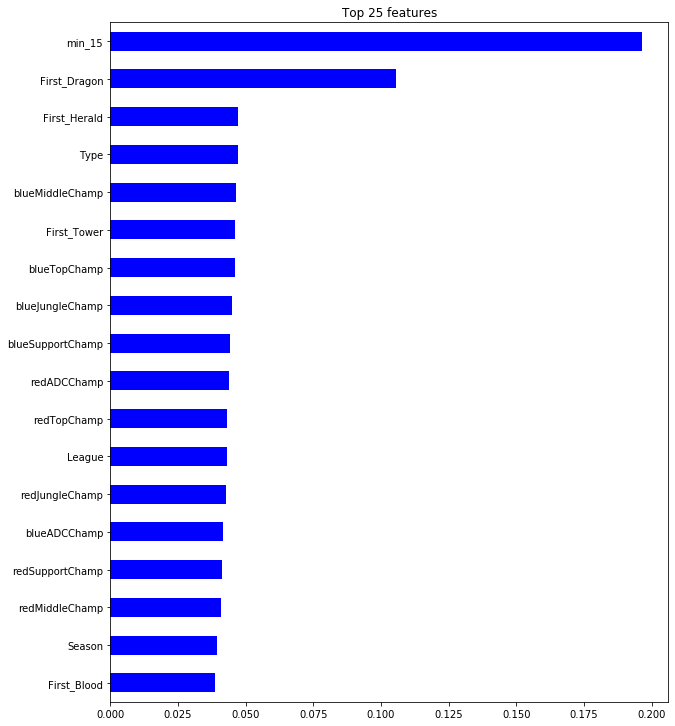

In [37]:
xg = pipe.named_steps['xgbclassifier']
importances = pd.Series(xg.feature_importances_, X_train.columns)

n = 25
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

## Permutation Importance

In [73]:
encoder = ce.OrdinalEncoder()
X_test_encoded = encoder.fit_transform(X_test)
X_train_encoded = encoder.fit_transform(X_train)

In [39]:
X_test_encoded.head()

,min_15,First_Herald,First_Dragon,First_Tower,First_Blood,League,Season,Type,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp
2789,-358,0,-1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4633,-3271,0,1,1,1,2,1,1,2,2,2,2,2,2,2,2,2,2
4840,2130,-1,-1,0,0,2,2,1,3,3,3,3,3,3,3,3,3,3
4398,3320,0,-1,0,0,2,2,1,4,4,4,4,2,4,4,3,4,4
3734,-2062,0,-1,1,1,3,1,1,5,5,5,1,2,1,4,4,2,5


In [40]:
y_test.head()

2789    0
4633    1
4840    0
4398    0
3734    1
Name: Win_Team, dtype: int64

In [74]:
permuter = PermutationImportance(pipe, scoring='accuracy',
                                 cv='prefit', n_iter=3, random_state=4)

permuter.fit(X_test_encoded, y_test)
feature_names = X_test_encoded.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1309 ± 0.0114,min_15
0.0418 ± 0.0055,First_Dragon
0.0057 ± 0.0007,First_Herald
0.0047 ± 0.0043,First_Tower
0.0004 ± 0.0045,First_Blood
0 ± 0.0000,redADCChamp
0 ± 0.0000,League
0 ± 0.0000,Season
0 ± 0.0000,Type
0 ± 0.0000,redSupportChamp


In [293]:
feature_names

['min_15',
 'First_Herald',
 'First_Dragon',
 'First_Tower',
 'First_Blood',
 'League',
 'Season',
 'Type',
 'blueTopChamp',
 'blueJungleChamp',
 'blueMiddleChamp',
 'blueADCChamp',
 'blueSupportChamp',
 'redTopChamp',
 'redJungleChamp',
 'redMiddleChamp',
 'redADCChamp',
 'redSupportChamp']

In [42]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (5334, 18)


In [75]:
mask = permuter.feature_importances_> 0 
features = X_train.columns[mask]
X_train = X_train[features]
print('Shape after removing features:', X_train.shape)
X_test = X_test[features]

Shape after removing features: (5334, 5)


In [76]:
X_train = X_train.applymap(lambda x: int(x))
X_train.head()

,min_15,First_Herald,First_Dragon,First_Tower,First_Blood
462,-80,1,1,1,0
3646,-1818,1,1,1,0
3087,-6294,1,1,1,1
6276,1778,0,-1,0,0
1108,-373,-1,1,1,1


In [299]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(random_state=42)
)

param_distributions = {
    'xgbclassifier__n_estimators': randint(50,500),
    'xgbclassifier__eta': uniform(0,1),
    'xgbclassifier__max_depth': randint(3,12),
    'xgbclassifier__gamma': randint(0,3),
    'xgbclassifier__subsample': uniform(0,1)
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=2
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    6.9s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   11.7s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   15.7s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   19.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   21.2s finished


In [300]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation accuracy', search.best_score_)

Best hyperparameters {'xgbclassifier__eta': 0.36914922037860765, 'xgbclassifier__gamma': 2, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 76, 'xgbclassifier__subsample': 0.37906329464875455}
Cross-validation accuracy 0.7272215973003374


In [77]:
pipe2 = make_pipeline(ce.OrdinalEncoder(),
                     StandardScaler(),
                     XGBClassifier(n_estimators=76, max_depth=3, gamma=2, eta= 0.36914922037860765,
                                   learning_rate=0.1, subsample=0.37906329464875455, nthread=-1)
)

pipe2.fit(X_train, y_train)
pipe2.score(X_train, y_train)

0.7401574803149606

In [78]:
y_pred = pipe2.predict(X_test)
print('Accuraccy', accuracy_score(y_test, y_pred))

Accuraccy 0.7309711286089239


## Partial Dependence Plots

In [63]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

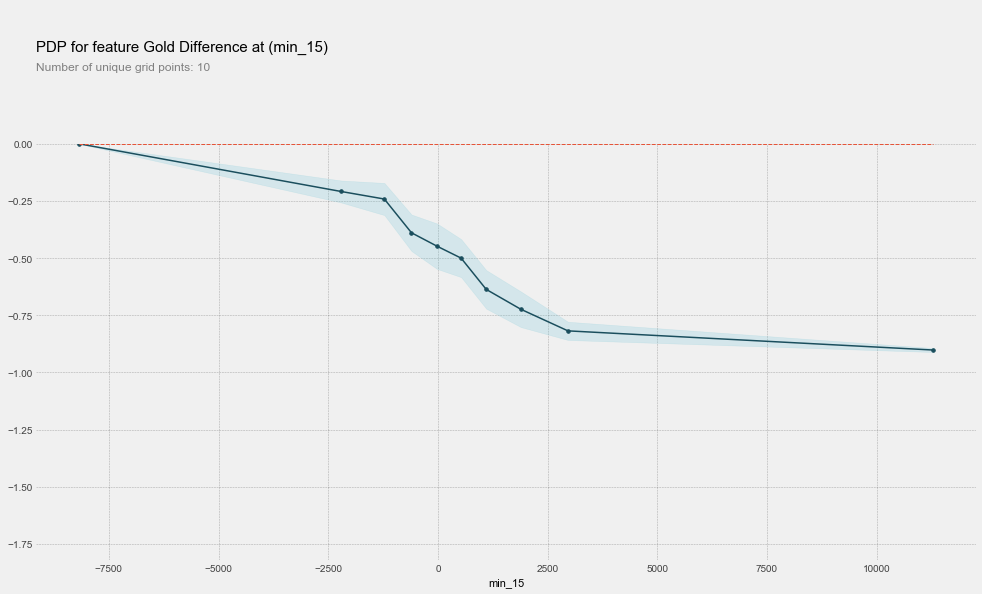

In [81]:
feature = 'min_15'

isolated = pdp_isolate(
    model=pipe2,
    dataset = X_test,
    model_features=X_test.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature, plot_params = {
    # plot title and subtitle
    'title': 'PDP for feature Gold Difference at (min_15)',
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'font_family': 'Arial',
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': '#1A4E5D',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 1.5,
    # horizon zero line color and with
    'zero_color': '#E75438',
    'zero_linewidth': 1,
    # pdp std fill color and alpha
    'fill_color': '#66C2D7',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 3.5,
});

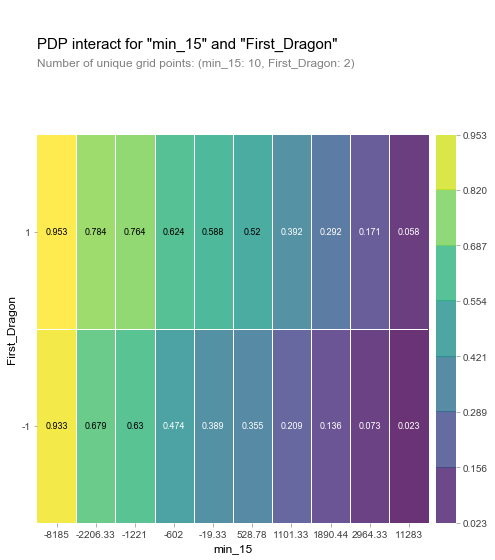

In [65]:
features = ['min_15', 'First_Dragon']

interaction = pdp_interact(
    model=pipe2,
    dataset = X_test,
    model_features=X_test.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

## Shapley

In [54]:
import shap

In [55]:
shap.initjs()
explainer = shap.TreeExplainer(pipe)
shap_values = explainer.shap_values(data_for_prediction_processed)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction_processed)

Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.pipeline.Pipeline'>

## Plotly 

In [223]:
import plotly.express as px
from joblib import dump, load

In [303]:
dump(pipe2, 'pipe2.joblib')

['pipe2.joblib']

In [304]:
print(X_train.shape)
X_train.head()

(5334, 5)


,min_15,First_Herald,First_Dragon,First_Tower,First_Blood
462,-80,1,1,1,0
3646,-1818,1,1,1,0
3087,-6294,1,1,1,1
6276,1778,0,-1,0,0
1108,-373,-1,1,1,1


In [251]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 1201 to 3398
Data columns (total 7 columns):
Total_bDragon_Count    5334 non-null int64
Total_rDragon_Count    5334 non-null int64
min_20                 5334 non-null int64
First_Baron            5334 non-null int64
First_Herald           5334 non-null int64
First_Dragon           5334 non-null int64
First_Tower            5334 non-null int64
dtypes: int64(7)
memory usage: 333.4 KB


# Surrender Prediction Model

In [331]:
lol_nonames.head()

,League,Year,Season,Type,gamelength,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp,Total_bDragon_Count,Total_rDragon_Count,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,x_pos_bkill,x_pos_rkill,y_pos_bkill,y_pos_rkill,First_Baron,First_Herald,First_Dragon,First_Tower,First_Blood,Win_Team
0,NALCS,2015,Spring,Season,40,Irelia,RekSai,Ahri,Jinx,Janna,Gnar,Elise,Fizz,Sivir,Thresh,1.0,3.0,0,0,-14,-65,-268,-431,-488,-789,-494,-625,-1044,-313,-760,-697,-790,-611,240,845.0,797.0,1422.0,987.0,169.0,432.0,491.0,1205.0,13908,10782,10314,10313,1,0,1,0,0,0
1,NALCS,2015,Spring,Season,38,Gnar,Rengar,Ahri,Caitlyn,Leona,Irelia,JarvanIV,Azir,Corki,Annie,3.0,1.0,0,0,-26,-18,147,237,-152,18,88,-242,102,117,802,1420,1394,1301,1489,1563.0,1368.0,1105.0,205.0,192.0,587.0,377.0,667.0,10142,10522,2686,2170,-1,0,1,1,0,1
2,NALCS,2015,Spring,Season,40,Renekton,Rengar,Fizz,Sivir,Annie,Sion,LeeSin,Azir,Corki,Janna,4.0,0.0,0,0,10,-60,34,37,589,1064,1258,913,1233,1597,1575,3046,2922,3074,3626,3466.0,5634.0,5293.0,4597.0,4360.0,4616.0,4489.0,4880.0,10060,10524,10518,10166,-1,0,-1,0,0,0
3,NALCS,2015,Spring,Season,41,Irelia,JarvanIV,Leblanc,Sivir,Thresh,Gnar,Nunu,Lulu,KogMaw,Janna,0.0,4.0,0,0,-15,25,228,-6,-243,175,-346,16,-258,-57,-190,-111,-335,-8,324,428.0,-124.0,768.0,2712.0,1813.0,198.0,1242.0,1245.0,10462,10054,13787,12133,-1,0,1,0,1,1
4,NALCS,2015,Spring,Season,35,Gnar,JarvanIV,Lissandra,Tristana,Janna,Sion,RekSai,Lulu,Corki,Annie,2.0,1.0,40,40,44,-36,113,158,-121,-191,23,205,156,272,-271,-896,-574,177,-425,-730.0,-318.0,478.0,926.0,761.0,-286.0,473.0,490.0,10715,10847,10414,10175,-1,0,-1,1,0,0


In [47]:
train1, test1  = train_test_split(lol_nonames, train_size=0.70, test_size=0.30,random_state=2)

train1.shape, test1.shape

((5334, 52), (2286, 52))

In [48]:
target1 = 'Win_Team'

train_features1 = train1.drop(columns=[target1, 'gamelength', 'min_25', 'Total_rDragon_Count', 'Total_bDragon_Count',
                                     'min_24', 'min_23', 'min_22', 'min_21', 'Year', 'min_1', 'min_2', 'min_3', 'min_4', 'min_5',
                                     'min_6', 'min_7', 'min_8', 'min_9', 'min_10', 'min_11', 'min_12', 'min_13', 'min_14',
                                     'min_16', 'min_17', 'min_18', 'min_19', 'min_20', 'min_15'])

# Get a list of the numeric features
features_numerical1 = train_features1.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality1 = train_features1.select_dtypes(exclude='number').nunique()

categorical_features1 = cardinality1[cardinality1 <= 100].index.tolist()

features1 = features_numerical1 + categorical_features1

X_train1 = train1[features1]
y_train1 = train1[target1]

X_test1 = test1[features1]
y_test1 = test1[target1]

In [49]:
print(X_train1.shape)
X_train1.head()

(5334, 18)


,First_Baron,First_Herald,First_Dragon,First_Tower,First_Blood,League,Season,Type,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp
5857,-1,1,-1,0,0,LJL,Spring,Season,Poppy,RekSai,Viktor,MissFortune,Thresh,Lulu,Kindred,Zed,Ezreal,Alistar
5274,-1,0,1,1,0,OPL,Spring,Season,Ekko,LeeSin,Ryze,KogMaw,Lulu,Maokai,Graves,Viktor,Varus,Nami
3679,-1,-1,-1,1,1,LMS,Spring,Season,Trundle,Gragas,Azir,Jhin,Thresh,Poppy,Graves,Corki,Sivir,Braum
4619,1,0,-1,0,1,TCL,Summer,Season,Illaoi,Gragas,Swain,Caitlyn,Taliyah,Ekko,RekSai,Anivia,Lucian,Karma
524,-1,1,1,0,0,NALCS,Summer,Season,Gnar,Gragas,Malzahar,Ashe,Thresh,Irelia,RekSai,Viktor,Sivir,Soraka


In [50]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(random_state=42)
)

param_distributions = {
    'xgbclassifier__n_estimators': randint(50,500),
    'xgbclassifier__eta': uniform(0,1),
    'xgbclassifier__max_depth': randint(3,12),
    'xgbclassifier__gamma': randint(0,3),
    'xgbclassifier__subsample': uniform(0,1)
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=2
)

search.fit(X_train1, y_train1);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    4.4s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   14.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   20.5s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   26.6s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   37.5s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   46.6s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   49.3s finished


In [51]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation accuracy', search.best_score_)

Best hyperparameters {'xgbclassifier__eta': 0.9386422738015299, 'xgbclassifier__gamma': 2, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 111, 'xgbclassifier__subsample': 0.25624476133366436}
Cross-validation accuracy 0.8415823022122235


In [52]:
pipe3 = make_pipeline(ce.OrdinalEncoder(),
                     StandardScaler(),
                     XGBClassifier(n_estimators=111, max_depth=3, gamma=2, eta= 0.9386422738015299,
                                   learning_rate=0.1, subsample=0.25624476133366436, nthread=-1)
)

pipe3.fit(X_train1, y_train1)
pipe3.score(X_train1, y_train1)

0.8513310836145482

In [53]:
y_pred1 = pipe3.predict(X_test1)
print('Accuraccy', accuracy_score(y_test1, y_pred1))

Accuraccy 0.8381452318460193


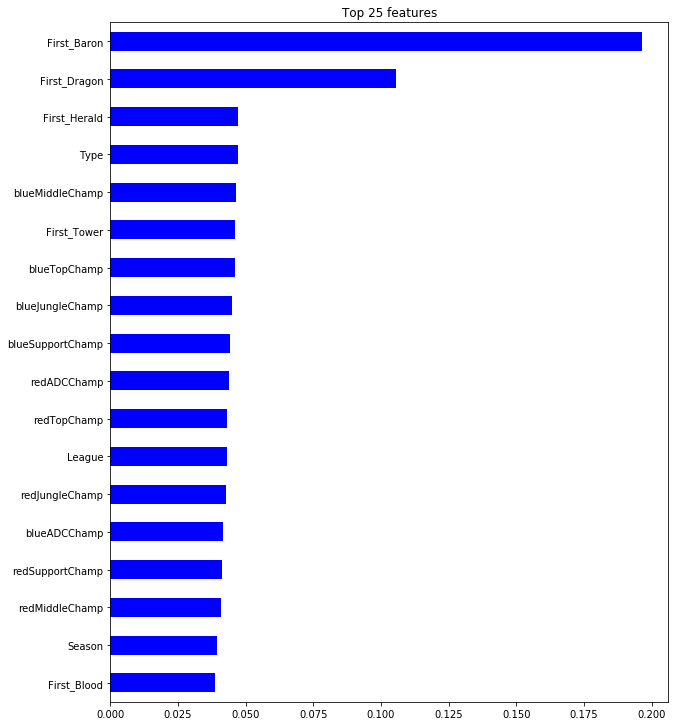

In [54]:
xg1 = pipe.named_steps['xgbclassifier']
importances1 = pd.Series(xg1.feature_importances_, X_train1.columns)

n = 25
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances1.sort_values()[-n:].plot.barh(color='blue');

In [55]:
encoder = ce.OrdinalEncoder()
X_test_encoded1 = encoder.fit_transform(X_test1)
X_train_encoded1 = encoder.fit_transform(X_train1)

In [358]:
print(X_test_encoded1.shape)
X_test_encoded1.head()

(2286, 18)


,First_Baron,First_Herald,First_Dragon,First_Tower,First_Blood,League,Season,Type,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp
4412,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
2741,-1,-1,-1,1,0,2,2,1,2,2,2,2,2,2,2,2,2,2
6438,-1,0,1,1,1,3,2,2,3,3,3,3,3,3,3,1,3,3
7524,-1,1,-1,1,0,4,1,1,4,4,4,4,2,4,4,3,4,4
838,1,0,1,0,1,5,1,3,2,5,1,5,4,5,5,4,5,5


In [56]:
permuter1 = PermutationImportance(pipe3, scoring='accuracy',
                                 cv='prefit', n_iter=2, random_state=4)

permuter1.fit(X_test_encoded1, y_test1)
feature_names1 = X_test_encoded1.columns.tolist()
eli5.show_weights(permuter1, top=None, feature_names=feature_names1)

Weight,Feature
0.2666 ± 0.0066,First_Baron
0.0190 ± 0.0066,First_Tower
0.0087 ± 0.0044,First_Dragon
0.0066 ± 0.0035,First_Blood
0.0046 ± 0.0048,First_Herald
0 ± 0.0000,redADCChamp
0 ± 0.0000,League
0 ± 0.0000,Season
0 ± 0.0000,Type
0 ± 0.0000,redSupportChamp


In [360]:
mask1 = permuter1.feature_importances_> 0 
features2 = X_train1.columns[mask1]
X_train1 = X_train1[features2]
print('Shape after removing features:', X_train1.shape)
X_test1 = X_test1[features2]

Shape after removing features: (5334, 5)


In [365]:
X_train1 = X_train1.applymap(lambda x: int(x))
X_train1.head()

,First_Baron,First_Herald,First_Dragon,First_Tower,First_Blood
5857,-1,1,-1,0,0
5274,-1,0,1,1,0
3679,-1,-1,-1,1,1
4619,1,0,-1,0,1
524,-1,1,1,0,0


In [364]:
pipe3 = make_pipeline(ce.OrdinalEncoder(),
                     StandardScaler(),
                     XGBClassifier(n_estimators=76, max_depth=4, gamma=0, eta= 0.2773401713940019,
                                   learning_rate=0.1, subsample=0.09042720308196017, nthread=-1)
)

pipe3.fit(X_train1, y_train1)
pipe3.score(X_train1, y_train1)

0.8453318335208099

In [366]:
y_pred1 = pipe3.predict(X_test1)
print('Accuraccy', accuracy_score(y_test1, y_pred1))

Accuraccy 0.8403324584426947


In [367]:
dump(pipe3, 'pipe3.joblib')

['pipe3.joblib']

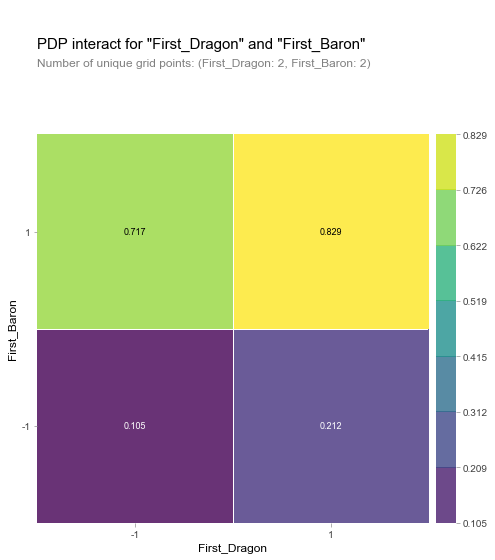

In [66]:
features = ['First_Dragon', 'First_Baron']

interaction = pdp_interact(
    model=pipe3,
    dataset = X_test1,
    model_features=X_test1.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);